<a href="https://colab.research.google.com/github/LahiWeer/2330902-ML_CW/blob/master/ML%20models/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
# Step 1: Load the dataset
data_url = 'https://raw.githubusercontent.com/LahiWeer/2330902-ML_CW/refs/heads/master/Preprocessing/resampled_and_original_data.csv'
data = pd.read_csv(data_url)

In [39]:
# Step 2: Inspect the data (Optional)
print(data.head())

   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56                0                 0              1               0   
1   57                0                 0              0               0   
2   37                0                 0              0               0   
3   40                0                 0              0               0   
4   56                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             1            0               0   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            0                  0             1            0               0   

   ...  campaign  pdays  previous  poutcome  emp.var.rate  con

In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61318 entries, 0 to 61317
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                61318 non-null  int64  
 1   job_blue-collar    61318 non-null  int64  
 2   job_entrepreneur   61318 non-null  int64  
 3   job_housemaid      61318 non-null  int64  
 4   job_management     61318 non-null  int64  
 5   job_retired        61318 non-null  int64  
 6   job_self-employed  61318 non-null  int64  
 7   job_services       61318 non-null  int64  
 8   job_student        61318 non-null  int64  
 9   job_technician     61318 non-null  int64  
 10  job_unemployed     61318 non-null  int64  
 11  marital_single     61318 non-null  int64  
 12  marital_married    61318 non-null  int64  
 13  marital_divorced   61318 non-null  int64  
 14  education          61318 non-null  int64  
 15  default            61318 non-null  int64  
 16  housing            613

In [28]:
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dense, Dropout, BatchNormalization

# Step 3: Separate features (X) and target (y)
# Replace 'y' with your actual target column name
X = data.drop('y', axis=1)
y = data['y']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use StandardScaler instead of MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with Stratified K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=23, shuffle=True, random_state=42)

# Initialize model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = Adam(learning_rate=0.0025)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and reduce learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train model using cross-validation
for train_idx, val_idx in kfold.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=300,
        batch_size=128,
        callbacks=[early_stopping, reduce_lr]
    )


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7952 - loss: 0.4497 - val_accuracy: 0.8575 - val_loss: 0.3321 - learning_rate: 0.0025
Epoch 2/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3559 - val_accuracy: 0.8729 - val_loss: 0.3213 - learning_rate: 0.0025
Epoch 3/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3440 - val_accuracy: 0.8683 - val_loss: 0.3190 - learning_rate: 0.0025
Epoch 4/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3423 - val_accuracy: 0.8725 - val_loss: 0.3115 - learning_rate: 0.0025
Epoch 5/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8630 - loss: 0.3329 - val_accuracy: 0.8772 - val_loss: 0.3063 - learning_rate: 0.0025
Epoch 6/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3294 - val_accuracy: 0.8669 - val_loss: 0.3136 - learning_rate: 0.0025
Epoch 7/300
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3282 - val_a

In [29]:
# Step 7: Predict on Test Data
y_pred_prob = model.predict(X_test_scaled)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)    # Convert probabilities to binary predictions

# Step 8: Evaluate Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8855185909980431

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      6132
           1       0.89      0.88      0.88      6132

    accuracy                           0.89     12264
   macro avg       0.89      0.89      0.89     12264
weighted avg       0.89      0.89      0.89     12264



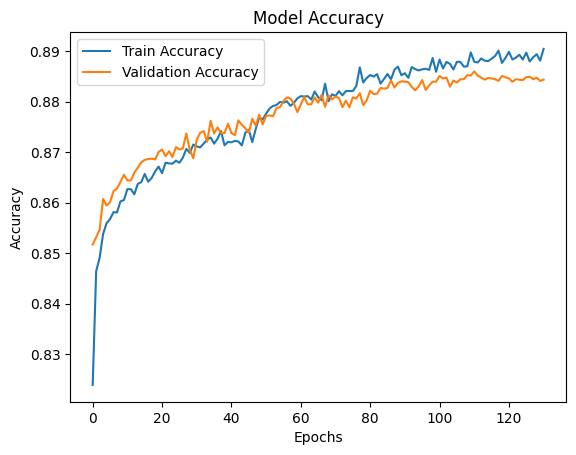

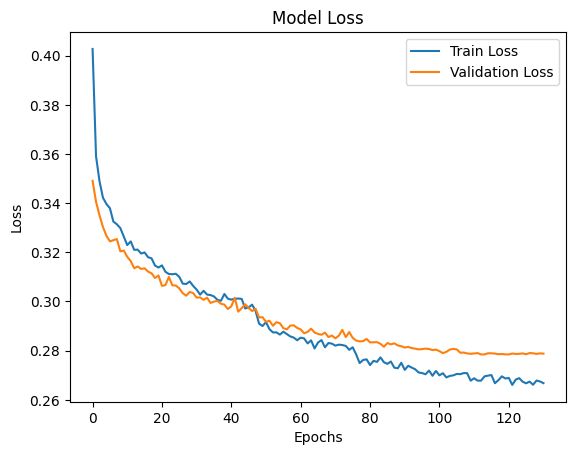

In [ ]:
# Plot training history (Optional)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()